Intall dependencies and import them

In [117]:
import cv2
import imghdr
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

Clean the data and select only images of certain extensions

In [118]:
data_dir = 'data' 

In [119]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [120]:
# os.listdir(data_dir) return the directories we have inside of data file ./data
for image_class in os.listdir(data_dir): 
    # os.path.join(data_dir, image_class) returns all the files inside of a specific directory located inside of data ./data/happy
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        # we load the image and look at the extension if exists we pass else we remove
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))


Visualize an image and interpreting it

In [121]:
# we load the image to test
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [122]:
img.shape
# the 3 means that the image is colored BGR

(3744, 5616, 3)

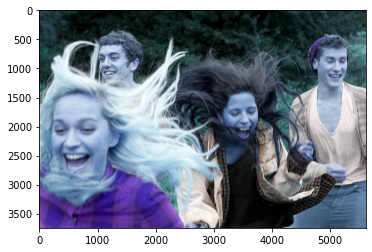

In [123]:
plt.imshow(img)

Change the image color to RGB with cv2

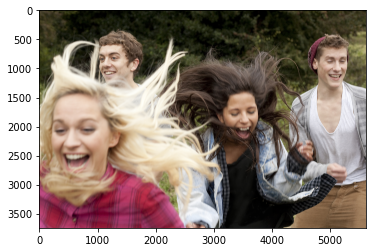

In [124]:
# we can change the image color from BGR to RBG 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Load the image dataset using tf.keras

In [125]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To process lines from files, use 

In [126]:
#this is a tensorflow dataset api to collect data from a list_files which is a possibility
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None)>

In [127]:
tf.keras.preprocessing.image_dataset_from_directory??

Signature:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    smart_resize=False,
)
Source:   
@keras_export('keras.preprocessing.image_dataset_from_directory', v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
                                 validation_split=None,
                                 subset=None,

In [128]:
# Load the datato build a image dataset
data = tf.keras.preprocessing.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [129]:
# Convert data to numpy iterator to be able to access and see the data
# loop through the data pipeline
data_iterator = data.as_numpy_iterator()

In [130]:
data_iterator

In [131]:
# get the consecutive batch using .next()
batch = data_iterator.next()

In [132]:
# there is two parts of our batch data there is the images ( images representation in numpy array form ) and there is the label
len(batch)

2

In [133]:
# images represented as numpy arrays in the first position we have the batch size then position 2 and 3 represents the image size and position 4 = 3 to say that the images are colored
batch[0].shape

(32, 256, 256, 3)

In [134]:
# 1 represents the sad class and 0 represents the happy class
batch[1]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

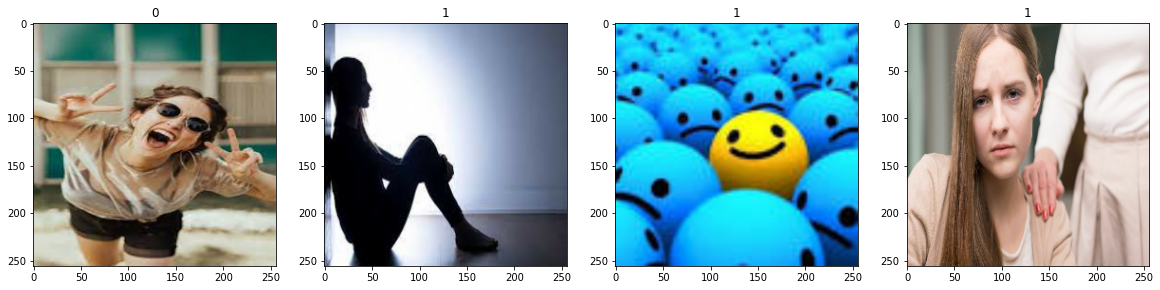

In [135]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data prepocessing

In [136]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [137]:
# here we will scale the image data (x) without touching the labels in (y)
data = data.map(lambda x,y: (x/255, y))
# the output data in here is scaled between 0 and 1

In [138]:
data.as_numpy_iterator().next()

(array([[[[0.92156863, 0.8980392 , 0.8352941 ],
          [0.92156863, 0.8980392 , 0.8352941 ],
          [0.92156863, 0.8980392 , 0.8352941 ],
          ...,
          [0.9098039 , 0.8841289 , 0.83908886],
          [0.9098039 , 0.8862745 , 0.8392157 ],
          [0.90590775, 0.88237834, 0.8277215 ]],
 
         [[0.92156863, 0.8980392 , 0.8352941 ],
          [0.92156863, 0.8980392 , 0.8352941 ],
          [0.92156863, 0.8980392 , 0.8352941 ],
          ...,
          [0.91764706, 0.8877451 , 0.83413756],
          [0.9112745 , 0.88308823, 0.83210784],
          [0.91086906, 0.88275886, 0.8378207 ]],
 
         [[0.92156863, 0.8980392 , 0.8352941 ],
          [0.92156863, 0.8980392 , 0.8352941 ],
          [0.92156863, 0.8980392 , 0.8352941 ],
          ...,
          [0.9161765 , 0.8980392 , 0.8509804 ],
          [0.92156863, 0.8980392 , 0.844751  ],
          [0.92156863, 0.8956222 , 0.8455882 ]],
 
         ...,
 
         [[0.22958888, 0.21105431, 0.239917  ],
          [0.22783

In [139]:
len(data)

10

In [140]:
# split our data to train validation and test sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [141]:
print(train_size)
print(val_size)
print(test_size)

7
2
1


In [142]:
# take and skip are two function that help us select the batchs ( the data has to be shuffled )
# we will take the first train_size
train = data.take(train_size)
# we skip the train size and take the val_size
val = data.skip(train_size).take(val_size)
#we skip everything we used and take the rest which is the test
test = data.skip(train_size+val_size).take(test_size)

Build the Deep Learning model

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [144]:
Conv2D??

Init signature: Conv2D(*args, **kwargs)
Source:        
class Conv2D(Conv):
  """2D convolution layer (e.g. spatial convolution over images).

  This layer creates a convolution kernel that is convolved
  with the layer input to produce a tensor of
  outputs. If `use_bias` is True,
  a bias vector is created and added to the outputs. Finally, if
  `activation` is not `None`, it is applied to the outputs as well.

  When using this layer as the first layer in a model,
  provide the keyword argument `input_shape`
  (tuple of integers or `None`, does not include the sample axis),
  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
  in `data_format="channels_last"`. You can use `None` when
  a dimension has variable size.

  Examples:

  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
  >>> # size is 4.
  >>> input_shape = (4, 28, 28, 3)
  >>> x = tf.random.normal(input_shape)
  >>> y = tf.keras.layers.Conv2D(
  ... 2, 3, activation='relu', input_shape=inp

In [145]:
MaxPooling2D??

Init signature: MaxPooling2D(*args, **kwargs)
Source:        
class MaxPooling2D(Pooling2D):
  """Max pooling operation for 2D spatial data.

  Downsamples the input along its spatial dimensions (height and width)
  by taking the maximum value over an input window
  (of size defined by `pool_size`) for each channel of the input.
  The window is shifted by `strides` along each dimension.

  The resulting output,
  when using the `"valid"` padding option, has a spatial shape
  (number of rows or columns) of:
  `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
  (when `input_shape >= pool_size`)

  The resulting output shape when using the `"same"` padding option is:
  `output_shape = math.floor((input_shape - 1) / strides) + 1`

  For example, for `strides=(1, 1)` and `padding="valid"`:

  >>> x = tf.constant([[1., 2., 3.],
  ...                  [4., 5., 6.],
  ...                  [7., 8., 9.]])
  >>> x = tf.reshape(x, [1, 3, 3, 1])
  >>> max_pool_2d = tf.keras.layer

In [146]:
model = Sequential()

# the first layer is an input layer, it is conv2d layer with 16 filters with size 3x3 and with a stride of 1 which means it moves 1 pixel at a time
# the activation is a relu => convert every negative to 0 and the positive is unchanged 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# condense the data
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# convert to a single dimension 
model.add(Flatten())

# fully connected layer
model.add(Dense(256, activation='relu'))
# we have a single output other 0 or 1 that why we used sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# we specify the optimizer, the losses and the metric we want to track
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [147]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)            

Train the model

In [148]:
logdir='logs'

In [149]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [150]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 71s 4s/step - loss: 0.9269 - accuracy: 0.5134 - val_loss: 0.6800 - val_accuracy: 0.5938
Epoch 2/20
7/7 [==============================] - 18s 2s/step - loss: 0.6934 - accuracy: 0.5312 - val_loss: 0.6449 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 18s 2s/step - loss: 0.6413 - accuracy: 0.6920 - val_loss: 0.5381 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.5205 - accuracy: 0.7634 - val_loss: 0.4458 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 18s 2s/step - loss: 0.4565 - accuracy: 0.7634 - val_loss: 0.3744 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.3466 - accuracy: 0.9018 - val_loss: 0.3371 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 0.3432 - accuracy: 0.8482 - val_loss: 0.3195 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

In [151]:
hist.history

{'loss': [0.9268566370010376,
  0.6934204697608948,
  0.6412859559059143,
  0.5205276608467102,
  0.4565056264400482,
  0.3465900719165802,
  0.3431675434112549,
  0.2835233509540558,
  0.19347251951694489,
  0.11979106813669205,
  0.08938895165920258,
  0.04918081313371658,
  0.01890261098742485,
  0.036167677491903305,
  0.04817983880639076,
  0.04873901605606079,
  0.03039303421974182,
  0.021663367748260498,
  0.03200288489460945,
  0.015626253560185432],
 'accuracy': [0.5133928656578064,
  0.53125,
  0.6919642686843872,
  0.7633928656578064,
  0.7633928656578064,
  0.9017857313156128,
  0.8482142686843872,
  0.9285714030265808,
  0.9285714030265808,
  0.9642857313156128,
  0.9732142686843872,
  0.9821428656578064,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128],
 'val_loss': [0.679964542388916,
  0.6448774337768555,
  0.538083016872406,
  0.44581830501556

Plot the performance

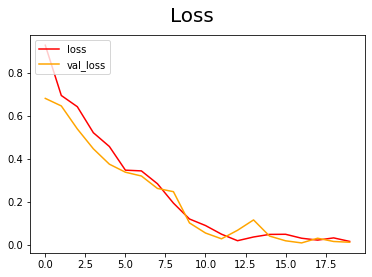

In [152]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

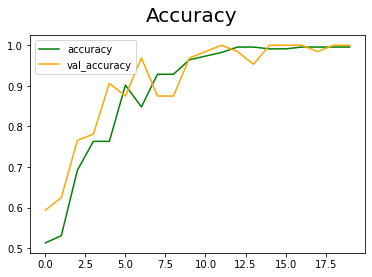

In [153]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [154]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [155]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [156]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test and predict

In [157]:
import cv2

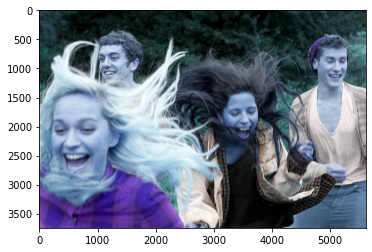

In [158]:
img = cv2.imread('./data/happy/154006829.jpg')
plt.imshow(img)
plt.show()

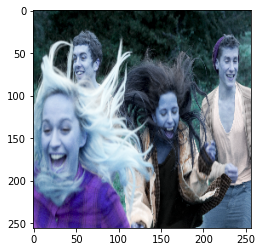

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [160]:
print(resize.shape)
print(np.expand_dims(resize/255,0).shape)

(256, 256, 3)
(1, 256, 256, 3)


In [161]:
# our model expects a batch of images not a single one so we have to insert our image inside of an array
# so need to wrap it into another set of arrays
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

array([[0.4014059]], dtype=float32)

In [162]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


Save the model

In [164]:
from tensorflow.keras.models import load_model

# save the model
model.save(os.path.join('models','imageclassifier.h5'))

# load the model to use it
new_model = load_model('./models/imageclassifier.h5')

#make predictions
new_model.predict(np.expand_dims(resize/255, 0))


array([[0.4014059]], dtype=float32)